# Instagram Bot - Part 2

### Table of Contents

1. [Introduction](#introduction)
2. [Project Objective](#project_objective)
3. [Imports](#imports)
4. [Login to Instagram with sample username and password](#login)
5. [Your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.](#q1)<br>
    a. [From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers](#q1_a)<br>
    b. [Now Find the number of posts these handles have done in the previous 3 days.](#q1_b)<br>
    c. [Depict this information using a suitable graph.](#q1_c)
6. [Your friend also needs a list of hashtags that he should use in his posts.](#q2)<br>
    a. [Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.](#q2_a)<br>
    b. [Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.](#q2_b)<br>
    c. [Create a csv file with two columns : the word and its frequency](#q2_c)<br>
    d. [Now, find the hashtags that were most popular among these bloggers](#q2_d)<br>
    e. [Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.](#q2_e)
7. [You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:](#q3)<br>
    a. [Find out the likes of the top 10 posts of the 5 handles obtained earlier.](#q3_a)<br>
    b. [Calculate the average likes for a handle.](#q3_b)<br>
    c. [Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.](#q3_c)<br>
    d. [Create a bar graph to depict the above obtained information.](#q3_d)

# Introduction <a id="introduction"/>

The objective of this project is to find the habbits of different food bloggers he followed, the hashtags he can use in his posts, and to calculate the average followers:likes ratio for the obtained handles using Selenium and with python version >= 3.6.

## Project Objective <a id="project_objective"/>

The aim of this project is to help friend further more in building his brand by finding the habbits of food handlers he followes, gather trending hashtags and find average followers:likes ratio, the task will be achieved with an automation technique using Selenium, by creating an Instagram Bot. 

## Imports <a id="imports"/>

In [199]:
import time                                                                
from bs4 import BeautifulSoup                                               
import matplotlib.pyplot as plt                                            
import pandas as pd
import numpy as np
from selenium import webdriver                                             # importing selenium web Driver
from selenium.webdriver.common.keys import Keys                            
from selenium.common.exceptions import NoSuchElementException              # importing to check for any exception
from selenium.webdriver.support import expected_conditions as EC           #using this librabry for explicitly wait
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.ui import Select                           
from selenium.webdriver.common.by import By                                

## Login to Instagram with sample username and password <a id="login"/>

In [200]:
# Connecting with chrome Webdriver
driver = webdriver.Chrome(executable_path = '/Users/lenovo/chromedriver')
driver.get("https://www.instagram.com/")
time.sleep(3)

# Go to login page
login = driver.find_element_by_link_text('Log in') # going to login page
login.click()                                      # clicking on it

# Entering details and signing in
time.sleep(3)
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')
username.send_keys('SAMPLE USERNAME')
password.send_keys('SAMPLE PASSWORD')
password.submit()

In [201]:
# Clicking on the alert popup
driver.find_element_by_xpath('//button[contains(@class,"aOOlW   HoLwm ")]').click()

In [202]:
def search(ele):
    search_box = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')  
    search_box.send_keys(ele)    

def search_clear():
    search_box = driver.find_elements_by_xpath('//input[contains(@class,"XTCLo")]')                        
    search_box.clear()

## Your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers. <a id="q1"/>

### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers <a id="q1_a"/>

In [203]:
search('food')                                                                        

time.sleep(3)
insta_handles = driver.find_elements_by_xpath('//div[@class = "fuqBx"]/a["href"]')                   #fecthing hadles of food 
food_list = []
for ele in insta_handles:
    if 'explore' in ele.get_attribute('href'):
        continue
    else:
        s = ele.get_attribute('href').split('/')
        if s[3]!="food" and s[3]!='foodytops':                                                 
            food_list.append(s[3])                                                            
            
search_clear()
search_box = driver.find_element_by_class_name('coreSpriteSearchClear')                                
search_box.click()

food_list = food_list[:10]                                                                #top 10 handles
data = {}
for ele in food_list:
    
    search(ele)
    
    time.sleep(3)
    
    # Searching and then clicking on first profile.
    f_search = driver.find_element_by_class_name("z556c")                                 
    f_search.click()
    
    time.sleep(2)
    followers_button = driver.find_element_by_xpath('//a[contains(@class,"-nal3")]')       
    followers_count = driver.find_elements_by_xpath('//a[contains(@class,"-nal3")]/span')  
    follow_count = followers_count[0].get_attribute('title')                               
    
    # Splitting the number from str with comma(,) into integer.
    split_numbers = follow_count.split(",") 
    number = int("".join(split_numbers))  
    data[ele] = number                   
    
    search_clear()

cnt = 1 # count variable
top_5_handle = []
no_of_followers = []
# Extracting top 5 handles with max followers from dictionary and appending them into lists.
for i in sorted (data.items(), key = lambda kv: kv[1],reverse=True):
    top_5_handle.append(i[0],)  
    no_of_followers.append(i[1])               
    cnt += 1
    if cnt>5:
        break

# Printing top 5 handles.
print('Top 5 Instagram handles with maximum followers')
for i in  range(5):
    print(top_5_handle[i]," : ",no_of_followers[i])

Top 5 Instagram handles with maximum followers
foodnetwork  :  9916692
yourfoodlab  :  840146
foodrush.recipe  :  670915
foodtalkindia  :  290103
foodmaniacindia  :  274794


### Now Find the number of posts these handles have done in the previous 3 days. <a id="q1_b"/>

In [205]:
no_of_post = {}

for handle in top_5_handle:
    
    search(handle)  
    
    time.sleep(3)
    b = driver.find_element_by_class_name('z556c')          #first profile
    first_search = driver.find_element_by_class_name('z556c')          
    first_search.click()
    
    time.sleep(2)
    search_clear()
    
    cnt = 0
    for i in range(9):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')        #scrolling 9 time towards bottom side.
        time.sleep(1)
    
    posts_data = driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')     #fetching the post.
    
    for j in range(9):  
        driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')       #scrolling towards top. 
        time.sleep(1)
    
    driver.execute_script('window.scrollBy(0,500);')                                   #scrolling down till post area. 
    
    for i in range(len(posts_data)):
        
        post = driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')               #finding post 
        driver.execute_script('window.scrollBy(0,75);')                                      
        
        post[i].click()                                                                      
        wait = WebDriverWait(driver, 10)                                                     
        post_data = wait.until(EC.presence_of_element_located((By.XPATH,'//time[contains(@class,"FH9sR")]')))
        
        val = post_data.text                            
        #checking the last charcter s for seconds, m for min, d for days, h for hour.
        if val[-1] == 'd':                          
            new_val = int(val[0:-1])
            if new_val<4:                        #only for three days
                cnt += 1
            else:
                new = driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                break
        else:
            if val[-1] == 'h':                     
                cnt += 1
            
            elif val[-1] == 's':
                cnt +=1
            
            elif val[-1] == 'm':                   
                cnt += 1
            
            else:
                new = driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                break
        
        # Finding and clicking on post close button.
        close_btn = driver.find_element_by_class_name('ckWGn')      
        close_btn.click()                                           
        time.sleep(1)
        
    no_of_post[handle] = cnt                                        #count adding in dictionary

insta_handles = []
posts_count = []
for i in no_of_post:
    insta_handles.append(i)                                            
    posts_count.append(no_of_post[i])
    
for i in range(len(insta_handles)):
    print(insta_handles[i],'',posts_count[i])

foodnetwork  33
yourfoodlab  0
foodrush.recipe  2
foodtalkindia  5
foodmaniacindia  3


### Depict this information using a suitable graph. <a id="q1_c"/>

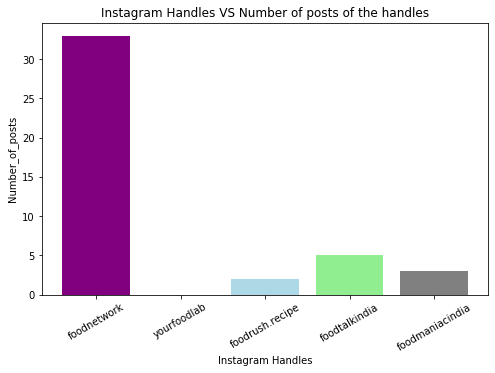

In [206]:
plt.subplots(figsize=(8,5))
plt.bar(insta_handles,posts_count,color=['Purple', 'Pink', 'LightBlue', 'LightGreen', 'Grey'])
plt.xticks(rotation=30)
plt.xlabel('Instagram Handles')
plt.ylabel('Number_of_posts')
plt.title('Instagram Handles VS Number of posts of the handles')
plt.show()

## Your friend also needs a list of hashtags that he should use in his posts.<a id="q2"/>

### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.<a id="q2_a"/>

In [207]:
top_5_handles = {}
for handle in top_5_handle:
    
    top_post = {}
    
    search(handle)
    wait = WebDriverWait(driver, 8)
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))                  #clicking on first profile.
    
    first_search = driver.find_element_by_class_name('z556c')
    first_search.click()
    
    search_clear()                                                                           # A fn for search box text clear.
    
    for i in range(1):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')                     
        time.sleep(1)
    
    data = driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                 #fetching the desired data. 
    
    for j in range(1):
        driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')             #scrolling toward top.
        time.sleep(1)
    
    driver.execute_script('window.scrollBy(0,500);')                                                
    
    for i in range(10):
        post = driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                       #fetch the post
        driver.execute_script('window.scrollBy(0,75);')                                              
 
        post[i].click()                                                                             #clicking on each post
        
        wait = WebDriverWait(driver, 10)                                                            #wait time
        data = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]//span')))
        value = data.text                                                                             #fetching the post data
        top_post["post"+str(i+1)] = value    
        new = driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')                      #close button
        new.click()
    
    top_5_handles[handle] = top_post

for key in top_5_handles.keys():
    p = top_5_handles[key]
    print(key)
    i = 0
    for key in p:
        print("----------------------Post",i+1,"----------------------")
        print(p[key])
        i += 1
        print()

foodnetwork
----------------------Post 1 ----------------------
Verified

----------------------Post 2 ----------------------
Verified

----------------------Post 3 ----------------------
Verified

----------------------Post 4 ----------------------
Verified

----------------------Post 5 ----------------------
Verified

----------------------Post 6 ----------------------
Verified

----------------------Post 7 ----------------------
Verified

----------------------Post 8 ----------------------
Verified

----------------------Post 9 ----------------------
Verified

----------------------Post 10 ----------------------
Verified

yourfoodlab
----------------------Post 1 ----------------------
Verified

----------------------Post 2 ----------------------
Verified

----------------------Post 3 ----------------------
Verified

----------------------Post 4 ----------------------
Verified

----------------------Post 5 ----------------------
Verified

----------------------Post 6 ----------------

### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.<a id="q2_b"/>

In [208]:
# creating dictionary and list of words.
total_freq = {}
all_words = []

for key1 in top_5_handles:
    p = top_5_handles[key1]
    i = 0
    for key2 in p:
        data = p[key2]
        split_words = data.split()
        for word in split_words:
            if word[0] == '#':                  # Checking for a hashtag
                word = word[1:]
                all_words.append(word)
                total_freq[word] = total_freq.get(word,0) + 1
                
for ele in total_freq:
    print(ele,' : ',total_freq[ele])

foodrush  :  10
dessert  :  2
whitechocolate  :  1
chocolatemousse  :  1
tiranga  :  1
dalrice  :  1
punjabi  :  1
rice  :  1
chaat  :  2
khakhra  :  1
party  :  1
orange  :  1
orangezest  :  1
chutney  :  1
dip  :  1
pongal  :  1
pongal2020  :  1
pongalrecipe  :  1
sakkaraipongal  :  1
potato  :  1
pav  :  1
hassleback  :  1
frankie  :  1
manchurian  :  1
manchurianfrankie  :  1
streetfood  :  2
noodles  :  1
chinese  :  1
idlisticks  :  1
piripirimasala  :  1
fries  :  2
piripiri  :  1
periperi  :  1
idli  :  1
chilicheeseshots  :  1
cheeseballs  :  1
chilicheeseballs  :  1
crispyballs  :  1
dosa  :  1
masaladosa  :  1
mysoredosa  :  1
mysoremasaladosa  :  1
foodmaniacindia  :  10
weekend  :  2
weekendvibes  :  2
saturdayvibes  :  2
delhi  :  4
delhifood  :  5
delhifoodblogger  :  3
delhifoodie  :  5
delhifoodbloggers  :  3
delhihram  :  1
delhidiaries  :  4
delhi_igers  :  4
gurgaon  :  1
indiagram  :  7
foodiesofinstagram  :  2
foodstagram  :  2
maggi  :  1
maggilover  :  1
cheesep

### Create a csv file with two columns : the word and its frequency<a id="q2_c"/>

In [209]:
word_freq_list = []
for i in total_freq:
    tup = []
    tup.append(i)
    tup.append(total_freq[i])
    word_freq_list.append(tup)
    
final_data = np.array(word_freq_list)
data_frame = pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
data_frame.to_csv('Frequency.csv',index=False)
print(data_frame)

                  Word Frequency
0             foodrush        10
1              dessert         2
2       whitechocolate         1
3      chocolatemousse         1
4              tiranga         1
..                 ...       ...
123        friyayvibes         1
124             friday         1
125     cheesesandwich         1
126           sandwich         1
127  beautifulcuisines         1

[128 rows x 2 columns]


### Now, find the hashtags that were most popular among these bloggers<a id="q2_d"/>

In [210]:
t = 1
top_hashtag_five = []
top_freq_five = []

updated = sorted(total_freq.items(), key = lambda kv:(kv[1], kv[0]),reverse = True)[0:5]
total_freq_updated = dict(updated)

for i in total_freq_updated:
    top_hashtag_five.append(i[0])
    top_freq_five.append(i[1])
    t+=1
    if t>5:
        break
print('Top Five Hashtags')
for ele in total_freq_updated:
    print(ele," : ",total_freq_updated[ele])

Top Five Hashtags
foodrush  :  10
foodmaniacindia  :  10
indianfood  :  8
indiagram  :  7
huffposttaste  :  6


### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.<a id="q2_e"/>

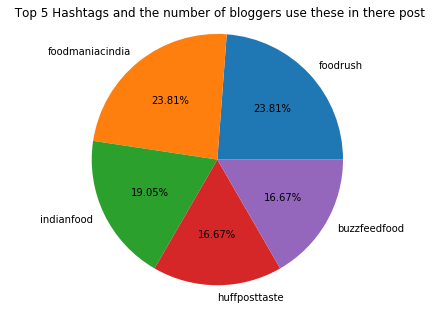

In [211]:
plt.subplots(figsize=(5,5))
plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.title("  Top 5 Hashtags and the number of bloggers use these in there post")
plt.axis("equal")
plt.show()

## You need to also calculate average followers : likes ratio for the obtained handles<br>Followers : Likes ratio is calculated as follows:<a id="q3"/>

### Find out the likes of the top 10 posts of the 5 handles obtained earlier.<a id="q3_a"/>

In [212]:
top_handles_five = {}
for handle in top_5_handle:
    top_10_post = {}
    
    search(handle)
    
    wait = WebDriverWait(driver, 8)
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))                  #clicking on first profile
    
    f_search = driver.find_element_by_class_name('z556c')
    f_search.click()
    
    search_clear()
    
    for i in range(1):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')                      #down scrolling
        time.sleep(1)
    
    data = driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                           #fetching the data 
    
    for j in range(1):
        driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')                     #up scrolling
        time.sleep(1)
    
    driver.execute_script('window.scrollBy(0,500);')                                                
    i = 0
    j = 0
    likes = []
    while j < 10 :
        post = driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                       #ftech the post
        driver.execute_script('window.scrollBy(0,75);')                                              # scroll by 80
 
        wait = WebDriverWait(driver, 10)
        time.sleep(2)
        post[i].click()                                                                             #clicking on each post
        try :
            time.sleep(2)
            data = driver.find_element_by_xpath('//button[contains(@class,"sqdOP yWX7d     _8A5w5    ")]/span')
            value = data.text                                                                             #fecthing post
            likes.append(value)
            j += 1
        except NoSuchElementException :
            pass

        new = driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')                      #close button
        new.click()
        i +=1

    top_handles_five[handle] = likes


for ele in top_handles_five:
    li = top_handles_five[ele]
    for i in range(len(li)):
        like = li[i].split(",")                                                              
        count = int("".join(like))                                                                  
        li[i] = count                                                                          
    top_handles_five[ele] = li 
        
for ele in top_handles_five:
    print(ele," : ",top_handles_five[ele])


foodnetwork  :  [3112, 6488, 12268, 6647, 11849, 3900, 7835, 17354, 26561, 7201]
yourfoodlab  :  [21025, 14141, 5696, 17991, 33344, 14489, 11313, 20769, 18695, 16482]
foodrush.recipe  :  [40736, 43624, 34414, 39110, 30796, 26623, 43646, 34765, 42641, 62655]
foodtalkindia  :  [296, 401, 950, 400, 1816, 739, 714, 1059, 535, 1698]
foodmaniacindia  :  [1288, 1925, 2575, 7095, 2381, 3636, 3929, 6697, 6842, 2935]


### Calculate the average likes for a handle.<a id="q3_b"/>

In [213]:
average_insta_handle = {}
for i in top_handles_five:
    cnt = 0
    total_sum = 0
    elements = top_handles_five[i]
    for ele in elements:
        cnt += 1
        total_sum += ele
    average = total_sum/cnt
    average_insta_handle[i] = average
    
for key in average_insta_handle.keys():
    print(key," : ","{0:.2f}".format(average_insta_handle[key]))

foodnetwork  :  10321.50
yourfoodlab  :  17394.50
foodrush.recipe  :  39901.00
foodtalkindia  :  860.80
foodmaniacindia  :  3930.30


### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.<a id="q3_c"/>

In [214]:
i = 0
average_follower = {}
for key in average_insta_handle.keys():
    avg = average_insta_handle[key]/no_of_followers[i]
    average_follower[key] = avg
    i += 1
x = []
y = []
for ele in average_follower:
    x.append(ele)
    y.append(average_follower[ele])
    print(ele," : ",average_follower[ele])
    

foodnetwork  :  0.0010408208705080283
yourfoodlab  :  0.02070413951860748
foodrush.recipe  :  0.05947251142096987
foodtalkindia  :  0.0029672219866736984
foodmaniacindia  :  0.014302714033057492


### Create a bar graph to depict the above obtained information.<a id="q3_d"/>

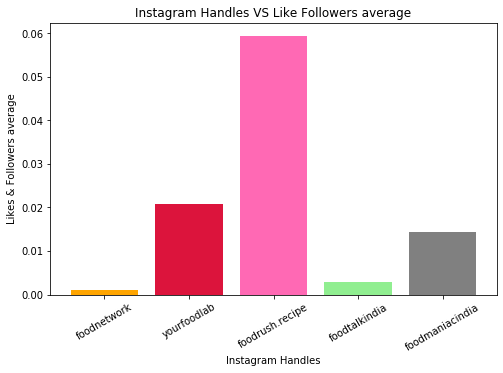

In [215]:
plt.subplots(figsize=(8,5))
plt.bar(x,y,color=['Orange', 'crimson', 'hotpink', 'LightGreen', 'Grey'])
plt.xticks(rotation = 30)
plt.xlabel('Instagram Handles')
plt.ylabel('Likes & Followers average')
plt.title('Instagram Handles VS Like Followers average')
plt.show()